## Лабораторная 1

Ссылка на датасет

https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)

In [2]:
df = pd.read_csv("spotify_dataset.csv", index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


#### Пропуски

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [4]:
df.loc[df.isna().sum(axis=1) > 0]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Так как в датасете только одна строка с пропущенными значениями, её можно удалить

In [5]:
df = df.dropna(how='any')
len(df)

113999

#### Дубликаты

In [6]:
df['track_id'].value_counts()[:10]

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
08kTa3SL9sV6Iy8KLKtGql    7
4XYieGKSlJlHpzB3bl6WMP    7
5ZsAhuQ24mWHiduaxJqnhW    7
0YLSjVxSb5FT1Bo8Tnxr8j    7
4WJTKbNJQ41zXnb84jSWaj    7
2aaClnypAakdAmLw74JXxB    7
2vU6bm5hVF2idVknGzqyPL    7
Name: count, dtype: int64

In [7]:
df[df['track_id'] == "2aaClnypAakdAmLw74JXxB"]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2988,2aaClnypAakdAmLw74JXxB,Sepultura,Metal,Arise,0,198226,False,0.371,0.961,9,-6.765,0,0.0931,0.000015,0.0548,0.0916,0.159,115.336,4,alt-rock
9372,2aaClnypAakdAmLw74JXxB,Sepultura,Metal,Arise,0,198226,False,0.371,0.961,9,-6.765,0,0.0931,0.000015,0.0548,0.0916,0.159,115.336,4,brazil
22034,2aaClnypAakdAmLw74JXxB,Sepultura,Metal,Arise,0,198226,False,0.371,0.961,9,-6.765,0,0.0931,0.000015,0.0548,0.0916,0.159,115.336,4,death-metal
43041,2aaClnypAakdAmLw74JXxB,Sepultura,Metal,Arise,0,198226,False,0.371,0.961,9,-6.765,0,0.0931,0.000015,0.0548,0.0916,0.159,115.336,4,groove
47341,2aaClnypAakdAmLw74JXxB,Sepultura,Metal,Arise,0,198226,False,0.371,0.961,9,-6.765,0,0.0931,0.000015,0.0548,0.0916,0.159,115.336,4,hard-rock
71344,2aaClnypAakdAmLw74JXxB,Sepultura,Metal,Arise,0,198226,False,0.371,0.961,9,-6.765,0,0.0931,0.000015,0.0548,0.0916,0.159,115.336,4,metal
87376,2aaClnypAakdAmLw74JXxB,Sepultura,Metal,Arise,0,198226,False,0.371,0.961,9,-6.765,0,0.0931,0.000015,0.0548,0.0916,0.159,115.336,4,r-n-b


In [8]:
df['track_genre'].value_counts().unique()

array([1000,  999], dtype=int64)

Если у трэка несколько жанров - в датасете несколько строк.

Причём представителей каждого жанра ровно 1000.

Потому можно временно отделить жанры от датасета через связь many-to-many (aka нормализация БД) 

In [9]:
genres_df = pd.DataFrame({"genre": df['track_genre'].unique()})
genres_df 

,genre
0,acoustic
1,afrobeat
2,alt-rock
3,alternative
4,ambient
...,...
109,techno
110,trance
111,trip-hop
112,turkish


In [10]:
track_genre_df = df[['track_id', 'track_genre']]
track_genre_df['track_genre'] = track_genre_df['track_genre'].apply(lambda x: genres_df[genres_df['genre'] == x].index[0])
track_genre_df

C:\Users\Jrytoeku Qtuhtc\AppData\Local\Temp\ipykernel_13184\174954502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_genre_df['track_genre'] = track_genre_df['track_genre'].apply(lambda x: genres_df[genres_df['genre'] == x].index[0])


,track_id,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,0
1,4qPNDBW1i3p13qLCt0Ki3A,0
2,1iJBSr7s7jYXzM8EGcbK5b,0
3,6lfxq3CG4xtTiEg7opyCyx,0
4,5vjLSffimiIP26QG5WcN2K,0
...,...,...
113995,2C3TZjDRiAzdyViavDJ217,113
113996,1hIz5L4IB9hN3WRYPOCGPw,113
113997,6x8ZfSoqDjuNa5SVP5QjvX,113
113998,2e6sXL2bYv4bSz6VTdnfLs,113


In [11]:
track_df = df.drop('track_genre', axis=1).drop_duplicates()
track_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


#### Выбросы

In [12]:
track_df = track_df.select_dtypes('number')
track_df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [13]:
track_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,90460.000000,9.046000e+04,90460.000000,90460.000000,90460.000000,90460.000000,90460.000000,90460.000000,90460.000000,90460.000000,90460.000000,90460.000000,90460.000000,90460.000000
mean,33.232003,2.291321e+05,0.562497,0.634824,5.284126,-8.490442,0.636900,0.087365,0.327650,0.172865,0.217087,0.469810,122.075536,3.897900
std,20.607727,1.127459e+05,0.176554,0.256320,3.559823,5.209360,0.480896,0.113035,0.338027,0.323404,0.195045,0.262789,30.114972,0.452414
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.730455e+05,0.450000,0.458000,2.000000,-10.312000,0.000000,0.036000,0.017100,0.000000,0.098200,0.250000,99.268750,4.000000
50%,33.000000,2.132930e+05,0.576000,0.677000,5.000000,-7.182000,1.000000,0.048950,0.187000,0.000058,0.132000,0.458000,122.017000,4.000000
75%,49.000000,2.642400e+05,0.692000,0.853000,8.000000,-5.107000,1.000000,0.085800,0.624000,0.095400,0.279000,0.683000,140.080000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Смотрим графики boxplot

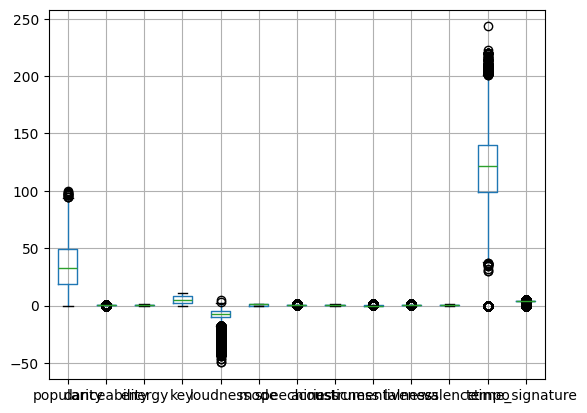

In [14]:
track_df.drop('duration_ms', axis=1).boxplot()
plt.show()

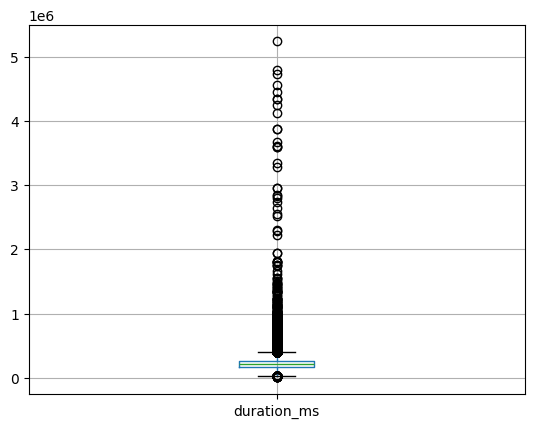

In [15]:
track_df[['duration_ms']].boxplot()
plt.show()

Почти во всех столбцах присутствуют выбросы, значит их нужно заменить

In [16]:
def interquartile(df: pd.DataFrame):
    Q1, Q3 = df.quantile(0.25), df.quantile(0.75)
    max_val, min_val = df.max(axis=0), df.min(axis=0)
    upper_bound = Q3 + (Q3 - Q1)*1.5
    lower_bound = Q1 - (Q3 - Q1)*1.5
    print("Границы по межквартильному расстоянию")
    for col in df.columns:
        print(col + ':\t\t' + str(((df[col] < lower_bound[col]) | (df[col] > upper_bound[col])).sum()) + " выбросов")
        df.loc[df[col] < lower_bound[col], col] = max(lower_bound[col], min_val[col])
        df.loc[df[col] > upper_bound[col], col] = min(upper_bound[col], max_val[col])

    return df
    

def z_quantile(df: pd.DataFrame, threshold = 3.0):
    mean = df.mean(axis=0)
    bound = threshold * df.std(axis=0)
    max_val, min_val = df.max(axis=0), df.min(axis=0)
    print("Границы по z-преобразованию")
    for col in df.columns:
        print(col + ':\t\t' + str(((df[col] < mean[col] - bound[col]) | (df[col] > mean[col] + bound[col])).sum()) + " выбросов")
        df.loc[df[col] < mean[col] - bound[col], col] = max(mean[col] - bound[col], min_val[col])
        df.loc[df[col] > mean[col] + bound[col], col] = min(mean[col] + bound[col], max_val[col])
    
    return df


Границы по межквартильному расстоянию
popularity:		12 выбросов
duration_ms:		4280 выбросов
danceability:		474 выбросов
energy:		0 выбросов
key:		0 выбросов
loudness:		5041 выбросов
mode:		0 выбросов
speechiness:		10711 выбросов
acousticness:		0 выбросов
instrumentalness:		19779 выбросов
liveness:		7053 выбросов
valence:		0 выбросов
tempo:		518 выбросов
time_signature:		10236 выбросов


C:\Users\Jrytoeku Qtuhtc\AppData\Local\Temp\ipykernel_13184\1658775263.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '36253.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound[col], col] = max(lower_bound[col], min_val[col])


<Axes: >

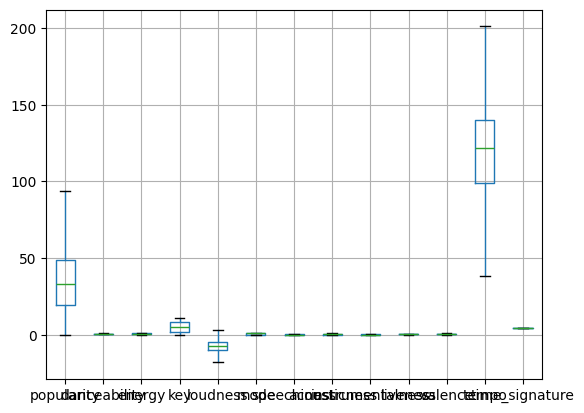

In [17]:
interquartile(track_df.copy()).drop('duration_ms', axis=1).boxplot()

Границы по z-преобразованию
popularity:		15794 выбросов
duration_ms:		4495 выбросов
danceability:		10682 выбросов
energy:		8268 выбросов
key:		7191 выбросов
loudness:		6604 выбросов
mode:		0 выбросов
speechiness:		5175 выбросов
acousticness:		10458 выбросов
instrumentalness:		14337 выбросов
liveness:		7550 выбросов
valence:		10834 выбросов
tempo:		11518 выбросов
time_signature:		10236 выбросов


C:\Users\Jrytoeku Qtuhtc\AppData\Local\Temp\ipykernel_13184\1658775263.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.083949196930206' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < mean[col] - bound[col], col] = max(mean[col] - bound[col], min_val[col])
C:\Users\Jrytoeku Qtuhtc\AppData\Local\Temp\ipykernel_13184\1658775263.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '53248.56923398111' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < mean[col] - bound[col], col] = max(mean[col] - bound[col], min_val[col])
C:\Users\Jrytoeku Qtuhtc\AppData\Local\Temp\ipykernel_13184\1658775263.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version o

<Axes: >

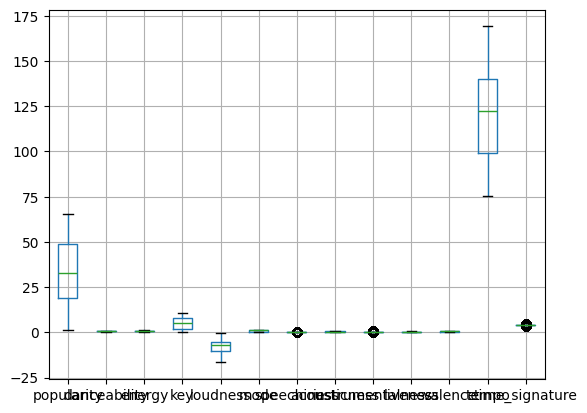

In [18]:
z_quantile(track_df.copy(), 1.56).drop('duration_ms', axis=1).boxplot()

Выбираем пороги по межквартильному расстоянию, потому что так сглаживание значений более плавное (подходящее под каждую переменную), а при нормально стандартизации число выбросов примерно одинаковое, что не отражает разницу их распределений.

Границы по межквартильному расстоянию
popularity:		12 выбросов
duration_ms:		4280 выбросов
danceability:		474 выбросов
energy:		0 выбросов
key:		0 выбросов
loudness:		5041 выбросов
mode:		0 выбросов
speechiness:		10711 выбросов
acousticness:		0 выбросов
instrumentalness:		19779 выбросов
liveness:		7053 выбросов
valence:		0 выбросов
tempo:		518 выбросов
time_signature:		10236 выбросов


C:\Users\Jrytoeku Qtuhtc\AppData\Local\Temp\ipykernel_13184\1658775263.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '36253.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound[col], col] = max(lower_bound[col], min_val[col])


<Axes: >

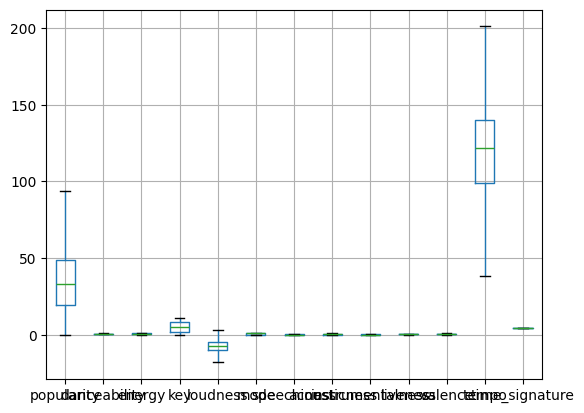

In [19]:
interquartile(track_df)
track_df.drop("duration_ms", axis=1).boxplot()